In [45]:
import geopandas as gpd
from demeter.preproc_logic.raster2gpd import raster2gdf, raster_cropping
from demeter.preproc_logic.gpd2grid_features import gpd2grid_features
from construct_grid import make_grid

%reload_ext autoreload

%autoreload 2

In [25]:
germany = gpd.read_file('../raw_data/germany.json')
berlin = germany[germany['NAME_3']=='Berlin']

In [62]:
path_to_raster = '../raw_data/raw_berlin/urban_class_berlin_proc.tif'
gdf = raster2gdf(path_to_raster)

In [63]:

gdf3 = gpd2grid_features(gdf,berlin,grid_size=1000,urban_classification_switch=True)
gdf3

/Users/zilikons/code/zilikons/demeter/demeter/preproc_logic/gpd2grid_features.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf = gdf.drop(columns=['X','Y','Z']).to_crs(epsg=3035)


,geometry,veg,road,water,resi,non_resi
0,"POLYGON ((4568039.698 3253860.913, 4569039.698...",9169,146,34,5225,119
1,"POLYGON ((4569039.698 3253860.913, 4570039.698...",2686,0,34,764,7
2,"POLYGON ((4568039.698 3254860.913, 4569039.698...",6295,254,57,3205,110
3,"POLYGON ((4569039.698 3254860.913, 4570039.698...",719,0,4,267,0
4,"POLYGON ((4570039.698 3254860.913, 4571039.698...",4609,92,54,2017,0
...,...,...,...,...,...,...
1007,"POLYGON ((4557039.698 3287860.913, 4558039.698...",928,0,0,297,0
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698...",8989,0,0,4373,0
1009,"POLYGON ((4554039.698 3288860.913, 4555039.698...",0,0,0,0,0
1010,"POLYGON ((4555039.698 3288860.913, 4556039.698...",0,0,0,0,0


In [64]:
gdf3.sum()

/var/folders/dy/8nkgqf653sggg31kzy33mjdr0000gn/T/ipykernel_78171/3368210236.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdf3.sum()


veg         8629012
road         236719
water         27145
resi        6002974
non_resi    1078243
dtype: int64

<Axes: >

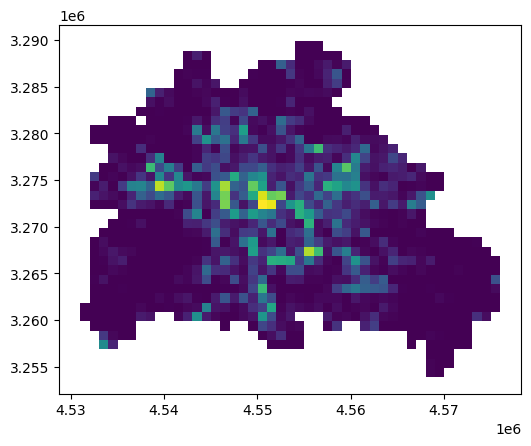

In [69]:
gdf3.plot(column='non_resi')

In [81]:
path_to_raster = '../raw_data/raw_berlin/pop_berlin_proc.tif'
gdf2 = raster2gdf(path_to_raster)
gdf2 = gpd2grid_features(gdf2,berlin,grid_size=1000,urban_classification_switch=False,feature_name='pop')
gdf2

/Users/zilikons/code/zilikons/demeter/demeter/preproc_logic/gpd2grid_features.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return gdf_final


,geometry,pop
0,"POLYGON ((4568039.698 3253860.913, 4569039.698...",1455.349396
1,"POLYGON ((4569039.698 3253860.913, 4570039.698...",988.113082
2,"POLYGON ((4568039.698 3254860.913, 4569039.698...",1089.498134
3,"POLYGON ((4569039.698 3254860.913, 4570039.698...",566.898857
4,"POLYGON ((4570039.698 3254860.913, 4571039.698...",655.700492
...,...,...
1007,"POLYGON ((4557039.698 3287860.913, 4558039.698...",460.015211
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698...",1274.134861
1009,"POLYGON ((4554039.698 3288860.913, 4555039.698...",0.000000
1010,"POLYGON ((4555039.698 3288860.913, 4556039.698...",0.000000


In [83]:
gdf3['pop'] = gdf2['pop']
gdf3

,geometry,veg,road,water,resi,non_resi,pop
0,"POLYGON ((4568039.698 3253860.913, 4569039.698...",9169,146,34,5225,119,1455.349396
1,"POLYGON ((4569039.698 3253860.913, 4570039.698...",2686,0,34,764,7,988.113082
2,"POLYGON ((4568039.698 3254860.913, 4569039.698...",6295,254,57,3205,110,1089.498134
3,"POLYGON ((4569039.698 3254860.913, 4570039.698...",719,0,4,267,0,566.898857
4,"POLYGON ((4570039.698 3254860.913, 4571039.698...",4609,92,54,2017,0,655.700492
...,...,...,...,...,...,...,...
1007,"POLYGON ((4557039.698 3287860.913, 4558039.698...",928,0,0,297,0,460.015211
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698...",8989,0,0,4373,0,1274.134861
1009,"POLYGON ((4554039.698 3288860.913, 4555039.698...",0,0,0,0,0,0.000000
1010,"POLYGON ((4555039.698 3288860.913, 4556039.698...",0,0,0,0,0,0.000000


In [9]:
landuse = gpd.read_file('../raw_data/landuse_grid_Berlin.json')
landuse.head(3)

,code_2018,class_2018,area,geometry
0,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
1,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64547 52.34099, 13.64694 52.34094..."
2,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64840 52.34090, 13.64987 52.34085..."


In [10]:
gdf2.reset_index(drop=True,inplace=True)

In [14]:
gdf2

,pop,geometry
0,"POLYGON ((1003762.005 6116158.467, 1004848.066...",12.479768
1,"POLYGON ((1003762.005 6116158.467, 1004848.066...",1.381813
2,"POLYGON ((1003762.005 6116158.467, 1004848.066...",6.439769
3,"POLYGON ((1003762.005 6116158.467, 1004848.066...",13.713840
4,"POLYGON ((1003762.005 6116158.467, 1004848.066...",0.851683
...,...,...
101023,"POLYGON ((988069.948 6148939.927, 989158.658 6...",0.000000
101024,"POLYGON ((988069.948 6148939.927, 989158.658 6...",0.000000
101025,"POLYGON ((988069.948 6148939.927, 989158.658 6...",0.000000
101026,"POLYGON ((988069.948 6148939.927, 989158.658 6...",0.000000


In [13]:
gdf

,veg,road,water,resi,non_resi,geometry
0,3,0,0,0,0,"POLYGON ((1003762.005 6116158.467, 1004848.066..."
1,3,0,0,0,0,"POLYGON ((1003762.005 6116158.467, 1004848.066..."
2,3,0,0,0,0,"POLYGON ((1003762.005 6116158.467, 1004848.066..."
3,3,0,0,0,0,"POLYGON ((1003762.005 6116158.467, 1004848.066..."
4,0,0,0,3,0,"POLYGON ((1003762.005 6116158.467, 1004848.066..."
...,...,...,...,...,...,...
10102151,0,0,0,0,0,"POLYGON ((988069.948 6148939.927, 989158.658 6..."
10102152,0,0,0,0,0,"POLYGON ((988069.948 6148939.927, 989158.658 6..."
10102153,0,0,0,0,0,"POLYGON ((988069.948 6148939.927, 989158.658 6..."
10102154,0,0,0,0,0,"POLYGON ((988069.948 6148939.927, 989158.658 6..."


In [6]:
berlin_grid = make_grid(berlin,1000)

In [74]:
test2 = gpd.read_file('../raw_data/landuse_grid_Berlin.json')
test2

,code_2018,class_2018,area,geometry
0,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
1,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64547 52.34099, 13.64694 52.34094..."
2,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64840 52.34090, 13.64987 52.34085..."
3,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64408 52.34193, 13.64555 52.34189..."
4,11220,Discontinuous medium density urban fabric (S.L...,95051.225653,"POLYGON ((13.64555 52.34189, 13.64701 52.34184..."
...,...,...,...,...
71476,32000,Herbaceous vegetation associations (natural gr...,13737.505410,"POLYGON ((13.47285 52.66910, 13.47433 52.66906..."
71477,23000,Pastures,25948.699349,"POLYGON ((13.47292 52.67000, 13.47440 52.66995..."
71478,23000,Pastures,25948.699349,"POLYGON ((13.47299 52.67089, 13.47447 52.67085..."
71479,23000,Pastures,25948.699349,"POLYGON ((13.47306 52.67179, 13.47454 52.67175..."


In [76]:
from assign_y import assign_y

In [77]:
berlin_grid

,geometry
0,"POLYGON ((4568039.698 3253860.913, 4569039.698..."
1,"POLYGON ((4569039.698 3253860.913, 4570039.698..."
2,"POLYGON ((4568039.698 3254860.913, 4569039.698..."
3,"POLYGON ((4569039.698 3254860.913, 4570039.698..."
4,"POLYGON ((4570039.698 3254860.913, 4571039.698..."
...,...
1007,"POLYGON ((4557039.698 3287860.913, 4558039.698..."
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698..."
1009,"POLYGON ((4554039.698 3288860.913, 4555039.698..."
1010,"POLYGON ((4555039.698 3288860.913, 4556039.698..."


In [79]:
y_gdf = gpd.read_file('../raw_data/berlin_grid_y.json')
y_gdf

,num_points_inside,geometry
0,4.836282,"POLYGON ((13.62620 52.33888, 13.64085 52.33843..."
1,1.386294,"POLYGON ((13.64085 52.33843, 13.65551 52.33798..."
2,3.091042,"POLYGON ((13.62693 52.34785, 13.64159 52.34741..."
3,1.945910,"POLYGON ((13.64159 52.34741, 13.65625 52.34696..."
4,3.178054,"POLYGON ((13.65625 52.34696, 13.67091 52.34650..."
...,...,...
1007,5.105945,"POLYGON ((13.48900 52.64884, 13.50376 52.64841..."
1008,4.189655,"POLYGON ((13.50376 52.64841, 13.51852 52.64797..."
1009,4.043051,"POLYGON ((13.44542 52.65910, 13.46019 52.65867..."
1010,3.688879,"POLYGON ((13.46019 52.65867, 13.47495 52.65824..."


In [80]:
y_gdf = y_gdf.to_crs(epsg=3035)
y_gdf.columns = ['y','geometry']

In [85]:
y_gdf

,y,geometry
0,4.836282,"POLYGON ((4568039.698 3253860.914, 4569039.701..."
1,1.386294,"POLYGON ((4569039.701 3253860.909, 4570039.695..."
2,3.091042,"POLYGON ((4568039.698 3254860.910, 4569039.697..."
3,1.945910,"POLYGON ((4569039.697 3254860.916, 4570039.702..."
4,3.178054,"POLYGON ((4570039.702 3254860.912, 4571039.698..."
...,...,...
1007,5.105945,"POLYGON ((4557039.698 3287860.919, 4558039.700..."
1008,4.189655,"POLYGON ((4558039.700 3287860.916, 4559039.699..."
1009,4.043051,"POLYGON ((4554039.697 3288860.912, 4555039.698..."
1010,3.688879,"POLYGON ((4555039.698 3288860.914, 4556039.696..."


In [87]:
final = gpd.sjoin(gdf3,y_gdf)
final

,geometry,veg,road,water,resi,non_resi,pop,index_right,y
0,"POLYGON ((4568039.698 3253860.913, 4569039.698...",9169,146,34,5225,119,1455.349396,1,1.386294
1,"POLYGON ((4569039.698 3253860.913, 4570039.698...",2686,0,34,764,7,988.113082,1,1.386294
2,"POLYGON ((4568039.698 3254860.913, 4569039.698...",6295,254,57,3205,110,1089.498134,1,1.386294
3,"POLYGON ((4569039.698 3254860.913, 4570039.698...",719,0,4,267,0,566.898857,1,1.386294
0,"POLYGON ((4568039.698 3253860.913, 4569039.698...",9169,146,34,5225,119,1455.349396,0,4.836282
...,...,...,...,...,...,...,...,...,...
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698...",8989,0,0,4373,0,1274.134861,1007,5.105945
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698...",8989,0,0,4373,0,1274.134861,1008,4.189655
1009,"POLYGON ((4554039.698 3288860.913, 4555039.698...",0,0,0,0,0,0.000000,1010,3.688879
1010,"POLYGON ((4555039.698 3288860.913, 4556039.698...",0,0,0,0,0,0.000000,1010,3.688879


In [90]:
final_grouped = final.groupby('index_right').mean()

/var/folders/dy/8nkgqf653sggg31kzy33mjdr0000gn/T/ipykernel_78171/1652767037.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_grouped = final.groupby('index_right').mean()


In [91]:
final_gdf = berlin_grid.merge(final_grouped,left_index=True,right_index=True)
final_gdf

,geometry,veg,road,water,resi,non_resi,pop,y
0,"POLYGON ((4568039.698 3253860.913, 4569039.698...",6050.000000,133.333333,41.666667,3064.666667,78.666667,1177.653537,4.836282
1,"POLYGON ((4569039.698 3253860.913, 4570039.698...",4717.250000,100.000000,32.250000,2365.250000,59.000000,1024.964867,1.386294
2,"POLYGON ((4568039.698 3254860.913, 4569039.698...",6656.000000,168.666667,37.666667,3700.666667,78.333333,1072.872836,3.091042
3,"POLYGON ((4569039.698 3254860.913, 4570039.698...",3139.000000,75.333333,28.500000,1488.666667,20.500000,662.913340,1.945910
4,"POLYGON ((4570039.698 3254860.913, 4571039.698...",1903.666667,30.666667,25.666667,788.000000,0.000000,416.931267,3.178054
...,...,...,...,...,...,...,...,...
1007,"POLYGON ((4557039.698 3287860.913, 4558039.698...",4958.500000,0.000000,0.000000,2335.000000,0.000000,867.075036,5.105945
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698...",8989.000000,0.000000,0.000000,4373.000000,0.000000,1274.134861,4.189655
1009,"POLYGON ((4554039.698 3288860.913, 4555039.698...",1105.500000,113.000000,0.000000,549.500000,12.000000,174.737881,4.043051
1010,"POLYGON ((4555039.698 3288860.913, 4556039.698...",23.000000,0.000000,0.000000,6.000000,0.000000,2.787115,3.688879


In [92]:
final_gdf.to_file('../data/berlin_1k.json')

In [86]:
gdf3

,geometry,veg,road,water,resi,non_resi,pop
0,"POLYGON ((4568039.698 3253860.913, 4569039.698...",9169,146,34,5225,119,1455.349396
1,"POLYGON ((4569039.698 3253860.913, 4570039.698...",2686,0,34,764,7,988.113082
2,"POLYGON ((4568039.698 3254860.913, 4569039.698...",6295,254,57,3205,110,1089.498134
3,"POLYGON ((4569039.698 3254860.913, 4570039.698...",719,0,4,267,0,566.898857
4,"POLYGON ((4570039.698 3254860.913, 4571039.698...",4609,92,54,2017,0,655.700492
...,...,...,...,...,...,...,...
1007,"POLYGON ((4557039.698 3287860.913, 4558039.698...",928,0,0,297,0,460.015211
1008,"POLYGON ((4558039.698 3287860.913, 4559039.698...",8989,0,0,4373,0,1274.134861
1009,"POLYGON ((4554039.698 3288860.913, 4555039.698...",0,0,0,0,0,0.000000
1010,"POLYGON ((4555039.698 3288860.913, 4556039.698...",0,0,0,0,0,0.000000
